In [29]:
# Dependencies
import matplotlib.pyplot as plt
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

import keras
from keras.preprocessing import image
from keras.applications.vgg19 import (
    VGG19, preprocess_input, decode_predictions)

In [30]:
# Load the VGG19 model
# https://keras.io/applications/#VGG19
model = VGG19(
    include_top=True,
    weights='imagenet')

In [31]:
# Default Image Size for VGG19
# Image size is defined in the docs here: https://keras.io/applications/#vgg19
image_size = (224, 224)

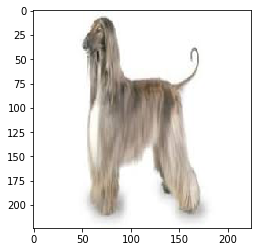

In [32]:
# Load the image and resize to the input dimensions that VGG19
# was trained with
image_path = os.path.join("..", "Images", "dog 1.jpg")
img = image.load_img(image_path, target_size=image_size)
plt.imshow(img)

In [33]:
# Preprocess image for model prediction
# This step handles scaling and normalization for VGG19
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

Predicted: [('n02088094', 'Afghan_hound', 0.94314307), ('n02091831', 'Saluki', 0.04267658), ('n02102480', 'Sussex_spaniel', 0.0018401827)]


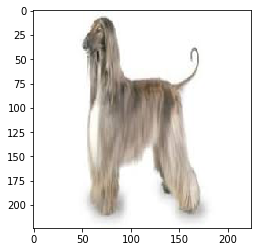

In [34]:
# Make predictions
predictions = model.predict(x)
print('Predicted:', decode_predictions(predictions, top=3)[0])
plt.imshow(img)

In [35]:
# Refactor above steps into reusable function
def predict(image_path):
    """Use VGG19 to label image"""
    img = image.load_img(image_path, target_size=image_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    predictions = model.predict(x)
    plt.imshow(img)
    print('Predicted:', decode_predictions(predictions, top=3)[0])

Predicted: [('n02007558', 'flamingo', 0.99999917), ('n01443537', 'goldfish', 4.0129848e-07), ('n01728572', 'thunder_snake', 1.0757237e-07)]


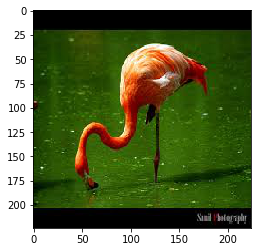

In [38]:
image_path = os.path.join("..", "Images", "bird3.jpg")
predict(image_path)